In [1]:
import numpy as np
from matplotlib import pyplot as plt

from collections import Counter
from sklearn.datasets import make_moons

In [2]:
x_train, y_train = make_moons(100, noise=0.05, random_state=1)
x_test, y_test = make_moons(50, noise=0.12, random_state=1)

In [3]:
print(x_train.shape)
y_train = y_train.reshape((x_train.shape[0], 1))
print(y_train.shape)

(100, 2)
(100, 1)


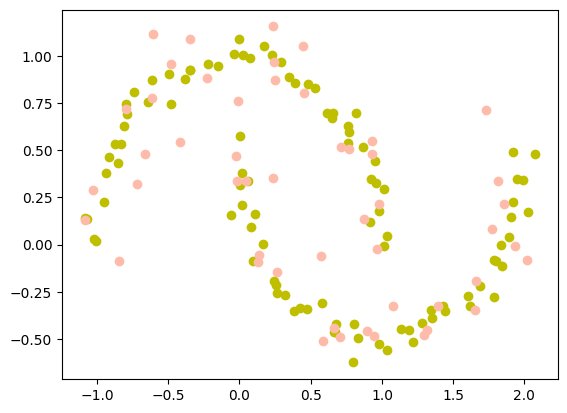

In [4]:
plt.scatter(x_train[:, 0], x_train[:, 1], c="y")
plt.scatter(x_test[:, 0], x_test[:, 1], c="#FFBBAAFF")

plt.show()

In [5]:
class KNNClassifier:

    def __init__(self, k: int):
        """ Initialization function """
        self.explanatory_variable = None
        self.target_variable = None
        self.k = k

    def fit(self, x: np.ndarray, y: np.ndarray):
        """ Training of the model which consist of save the train dataset"""
        self.explanatory_variable = x
        self.target_variable = y

    @staticmethod
    def euclidean_distance(a: np.ndarray, b: np.ndarray):
        """ Compute the Euclidean distance between two vectors """
        return np.sqrt(np.sum(np.square(a-b)))

    def k_nearest_target_value(self, x: np.ndarray) -> np.ndarray :
        """ Find the target value of the k nearest observations of the exemple x"""
        # Keep only the index of the k minimum distance
        k_min_index = np.argsort(x)[:self.k]
        # Return the target value of the k nearest neighbors
        return np.squeeze(self.target_variable[k_min_index])

    @staticmethod
    def max_class(x: np.ndarray) -> np.ndarray:
        """ Return the most frequent class value in the vector x"""
        count_class = Counter(x)
        return max(count_class, key=count_class.get)

    def predict_class(self, x: np.ndarray) -> any:
        """
        Predict the average of the k nearest target
        :param x:
        :return:
        """
        # Compute the distance for every observation of our training dataset
        distance_matrix = list(map(lambda var : KNNClassifier.euclidean_distance(x, var), self.explanatory_variable))
        # Keep only the target value of the k nearest neighbors
        k_target = self.k_nearest_target_value(distance_matrix)
        # Return the most frequent target value
        return KNNClassifier.max_class(k_target)

    def predict(self, x: np.ndarray) -> np.ndarray:
        """Make predict of all the x dataset"""
        return np.array(list(map(lambda var : self.predict_class(var), x)))

In [6]:
knn = KNNClassifier(5)
knn.fit(x_train,y_train)

In [7]:
prediction = knn.predict(x_test)

In [8]:
prediction

array([1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1])

In [9]:
class KNNRegressor:

    def __init__(self, k: int):
        """ Initialization function """
        self.explanatory_variable = None
        self.target_variable = None
        self.k = k

    def fit(self, x: np.ndarray, y: np.ndarray):
        """ Training of the model which consist of save the train dataset"""
        self.explanatory_variable = x
        self.target_variable = y

    @staticmethod
    def euclidean_distance(a: np.ndarray, b: np.ndarray):
        """ Compute the Euclidean distance between two vectors """
        return np.sqrt(np.sum(np.square(a-b)))

    def k_nearest_target_value(self, x: np.ndarray) -> np.ndarray :
        """ Find the target value of the k nearest observations of the exemple x"""
        # Keep only the index of the k minimum distance
        k_min_index = np.argsort(x)[:self.k]
        # Return the target value of the k nearest neighbors
        return np.squeeze(self.target_variable[k_min_index])

    def predict_average(self, x: np.ndarray) -> float:
        """ Predict the average of the k nearest target """
        # Compute the distance for every observation of our training dataset
        distance_matrix = list(map(lambda var : KNNRegressor.euclidean_distance(x, var), self.explanatory_variable))
        # Keep only the target value of the k nearest neighbors
        k_target = self.k_nearest_target_value(distance_matrix)
        # Return the average target value
        return np.mean(k_target)


    def predict(self, x: np.ndarray) -> np.ndarray:
        """ Make predict of all the x dataset """
        return np.array(list(map(lambda var : self.predict_average(var), x)))